# Unsupervised Learning: Customer Segmentation 
## Background:
#### Using data on Customers like __Age, Gender, Income and Spending__,

#### __We aim to:__
-  perform __Customer Segmentation__, (helps organizations know what new products are services they might want to invest in, and uncovers ways to improve how the business sells.)
-  explore the different __characteristics__ of each customer cluster
-  find out which __group/cluster of customer__ is the __most valuable to the shopping mall__ (through purchase behavior, age,income spending power,etc.) such that the shopping mall should do something to __retain them__ 

#### __Dataset Features:__

- CustomerID : Unique ID assigned to the customer
- Gender : Gender of the customer
- Age : Age of the customer
- Annual Income (k$) : Annual Income of the customer
- How Much They Spend : spending score range from 0 - 100, the higher the score, the more they spend





In [1]:

import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
# Set the seaborn style
sns.set_style("darkgrid")


In [2]:
df = pd.read_csv('../Datasets/Customer_Dataset.csv')
df = df.rename(columns={'How Much They Spend': 'Spending Score'})
df.head()

,CustomerID,Gender,Age,Income (k$),Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [123]:
describe = df.describe().T
describe.style.background_gradient(cmap = "summer")

,count,mean,std,min,25%,50%,75%,max
Gender,200.000000,0.560000,0.497633,0.000000,0.000000,1.000000,1.000000,1.000000
Age,200.000000,38.850000,13.969007,18.000000,28.750000,36.000000,49.000000,70.000000
Income (k$),200.000000,60.560000,26.264721,15.000000,41.500000,61.500000,78.000000,137.000000
Spending Score,200.000000,50.200000,25.823522,1.000000,34.750000,50.000000,73.000000,99.000000


In [4]:
df.isna().sum()

CustomerID        0
Gender            0
Age               0
Income (k$)       0
Spending Score    0
dtype: int64

In [5]:
#Dropping of unused column
df.drop(columns=['CustomerID'],inplace=True)

# Data Exploration & Visualization

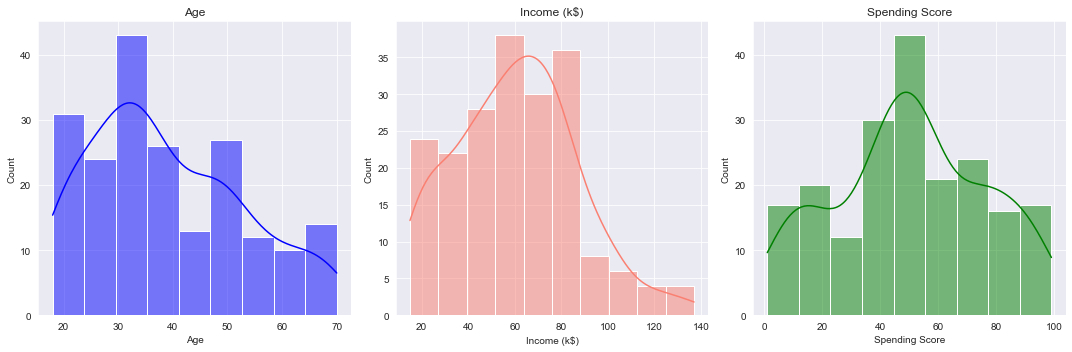

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histograms for each feature
sns.histplot(df['Age'], ax=axes[0], color='blue',kde=True)
sns.histplot(df['Income (k$)'], ax=axes[1], color='salmon',kde=True)
sns.histplot(df['Spending Score'], ax=axes[2], color='green',kde=True)

axes[0].set_title('Age')
axes[1].set_title('Income (k$)')
axes[2].set_title('Spending Score')


plt.tight_layout()
plt.show()


- We notice that the 3 features are not really __Gaussian/Normally distributed__

### Countplot of Gender


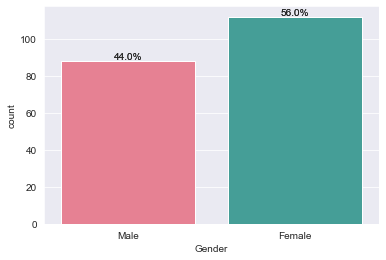

In [7]:

sns.countplot(data=df,x='Gender')

# Create the countplot
ax = sns.countplot(data=df, x='Gender',palette ='husl')

# Calculate the percentages
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

# Display the plot
plt.show()

- We see that the dataset contains more females(56%) to males(44%) out of 200 people
- But the imbalance is not too significant 

### Pairplot with Categorical feature Gender


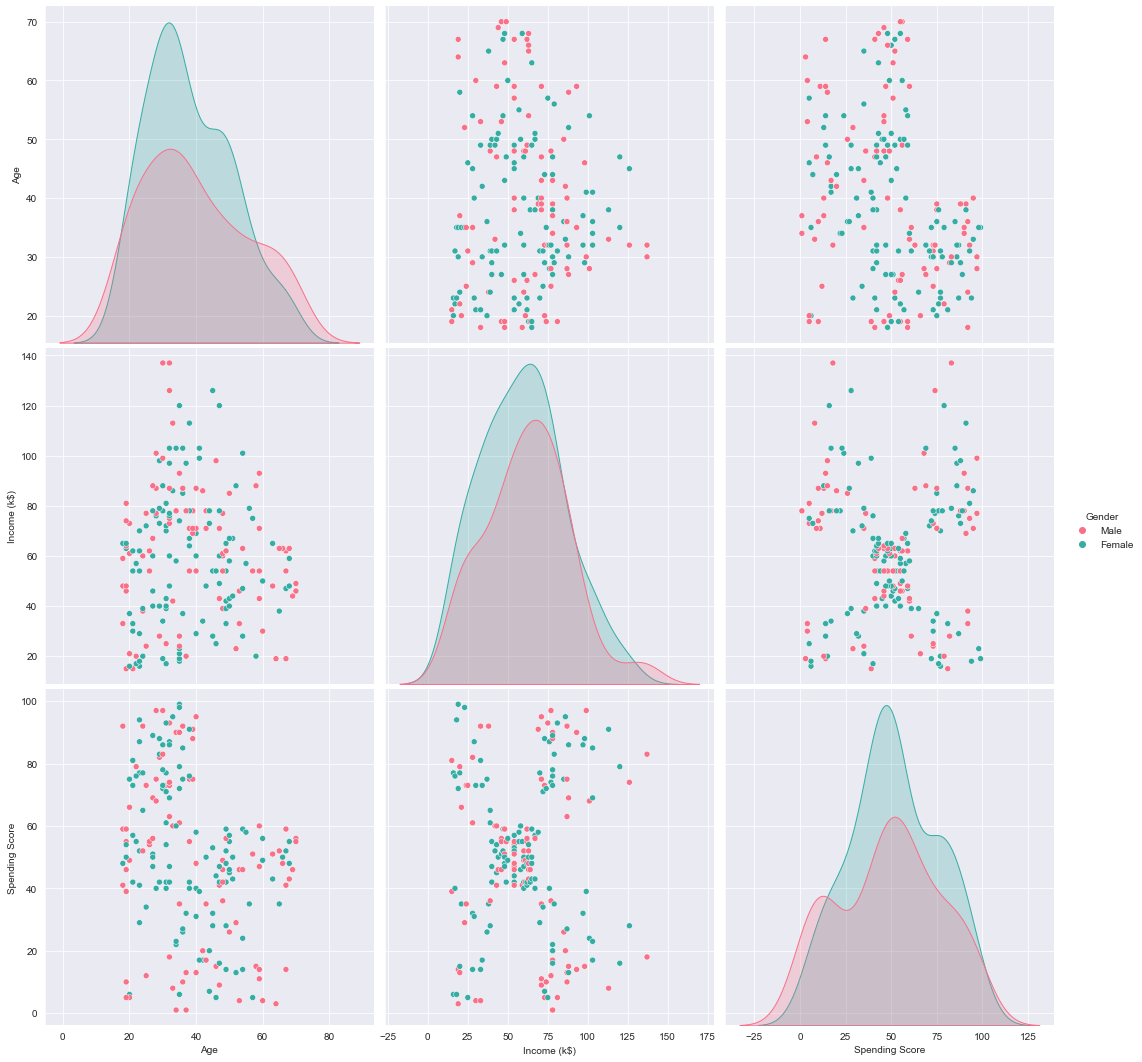

In [8]:
g = sns.pairplot(data=df,hue='Gender',palette ='husl',height=5)


- We can see that Gender is equally distributed / no clear patterns and does not really provide any significant information

### Looking 

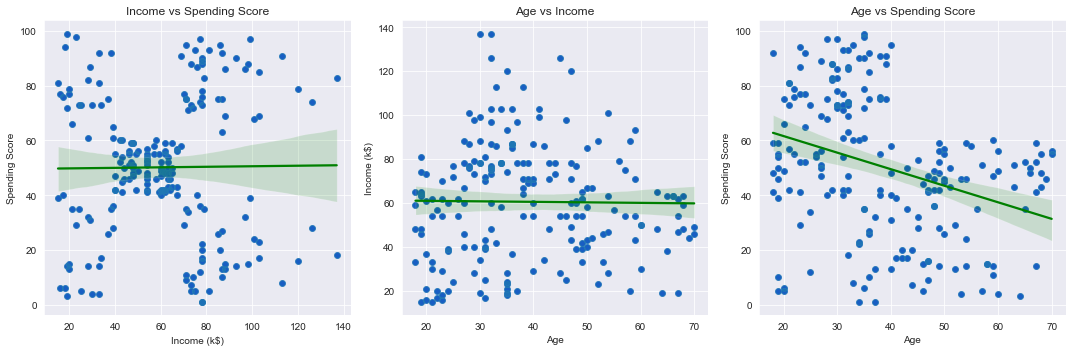

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Income (k$) vs Spending Score
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='Income (k$)', y='Spending Score', color='blue')
sns.regplot(data=df, x='Income (k$)', y='Spending Score', line_kws={'color': 'g'})
plt.title('Income vs Spending Score')

#Age vs Income (k$)
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='Age', y='Income (k$)', color='blue')
sns.regplot(data=df, x='Age', y='Income (k$)', line_kws={'color': 'g'})
plt.title('Age vs Income')

#Age vs Spending Score
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='Age', y='Spending Score', color='blue')
sns.regplot(data=df, x='Age', y='Spending Score', line_kws={'color': 'g'})
plt.title('Age vs Spending Score')

plt.tight_layout()
plt.show()


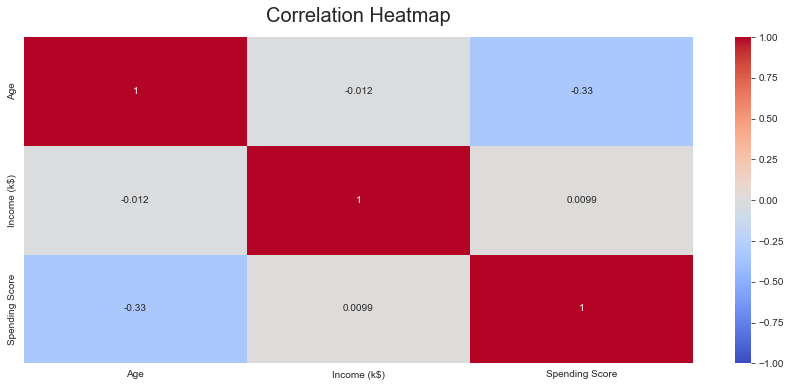

In [10]:
##Heatmap of Correlation
plt.figure(figsize=(15,6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True,cmap='coolwarm')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=15)

plt.show()


- signs of __negative correlation__ between __Age and How Much They Spend__

# Preprocessing

## Feature Scaling
#### we would be using __StandardScaler/Standardization__ instead of __Min-Max Scaling__ since we want to perform:
#### __`K-means Clustering`__ 
- Using __Euclidean__ distance (follows straight line between 2 points) 
- We do not want the K-means algo to be __biased__ towards variables with __higher magnitude__ as the model would give a __higher weightage__ to those variables if __not standardized__
- Perform __Standardization__ helps __prevent bias__ by bringing down variables to the __same scale__, usually between __0 and 1__
     
#### __`Gaussian Mixture Modelling`__     

#### __`PCA`__
- A __Dimension Reduction__ technique
- Which we want __features__ on the __same scale__ since we want to find the direction of __maximum variance__

#### __`t-SNE`__
- Utilizes __euclidean__ 

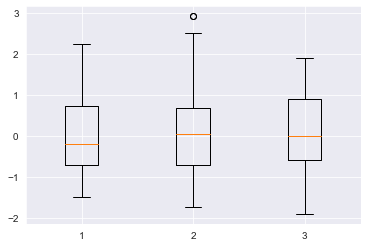

In [11]:

standard_scaler = StandardScaler()
df_std = standard_scaler.fit_transform(df.drop(columns='Gender'))
plt.boxplot(df_std)
plt.show()


### Adding scaled data to a DataFrame

In [12]:
scaled_features_df = pd.DataFrame(df_std, index=df.drop(columns='Gender').index, columns=df.drop(columns='Gender').columns)
#scaled_features_df = pd.concat([scaled_features_df,df[['Gender']]],axis=1)
scaled_features_df

,Age,Income (k$),Spending Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


### Mapping Gender to 0 and 1
- 0 for Male, 1 for Female

In [13]:
# Map 'Gender' to 0 for 'Male' and 1 for 'Female'
scaled_features_df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Clustering with 2 Features (at once)


### Functions __Silhouette Score, Elbow Plot and K-means Clustering__

In [324]:
# Clustering silhouette_score
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


## Silhouette Score function that plots a line chart
def sil_score(X):
    n_clusters_list = []  
    silhouette_scores = []  
    
    for k in range(2, 11):
        model = KMeans(n_clusters=k).fit(X)
        labels = model.labels_
        sil_coeff = silhouette_score(X, labels, metric='euclidean')
        n_clusters_list.append(k)
        silhouette_scores.append(sil_coeff)

    # Plot the silhouette scores
    plt.plot(n_clusters_list, silhouette_scores, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters (n_clusters)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores for Different Number of Clusters')
    plt.xticks(range(2, 11))  
    plt.grid(True)

## Elbow plot function that plots a line chart
def Elbow_plot(X):
    distortions = []
    K = range(1, 10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(X)
        distortions.append(kmeanModel.inertia_)

    plt.plot(K, distortions, 'ro-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the Optimal k')
    plt.grid(True)

## Involves both Elbow and Silhouette score functions to help with selecting n clusters
def n_clusters_selection(X):
    plt.figure(figsize=(15, 8))

    plt.subplot(1, 2, 1)
    sil_score(X)

    plt.subplot(1, 2, 2)
    Elbow_plot(X)

    plt.tight_layout()
    plt.show()


## 2D K-means clustering with plot
def Kmeans_cluster(X, n_clusters):
    model = KMeans(n_clusters=n_clusters)
    model.fit(X)

    y_kmeans = model.predict(X) 

    plt.figure(figsize=(12, 10))
    # Plot each cluster separately and set custom colors for each cluster
    for i in range(n_clusters):

        cluster_mask = y_kmeans == i
        plt.scatter(X.iloc[cluster_mask, 0], X.iloc[cluster_mask, 1], s=50, label=f'Cluster {i+1}')

    centers = model.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.8, label='Cluster Centers')
    
    plt.legend()
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.title(f"K-means({n_clusters}) for {X.columns[0]} & {X.columns[1]}")
    
    # Add quadrant lines at x=0 and y=0
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)
    plt.axvline(0, color='gray', linestyle='--', linewidth=1)
    plt.show()


#### Using __Silhouette Scores__ and __Elbow method__ to determine best __No. of clusters__ for Income and How Much Customers Spend
- We would select __no. of clusters__ to be __`5`__ for our K-means clustering as its __silhouette coefficient was 0.555__
- Additionally, the __Elbow plot__ also shows an elbow at __`k=5`__

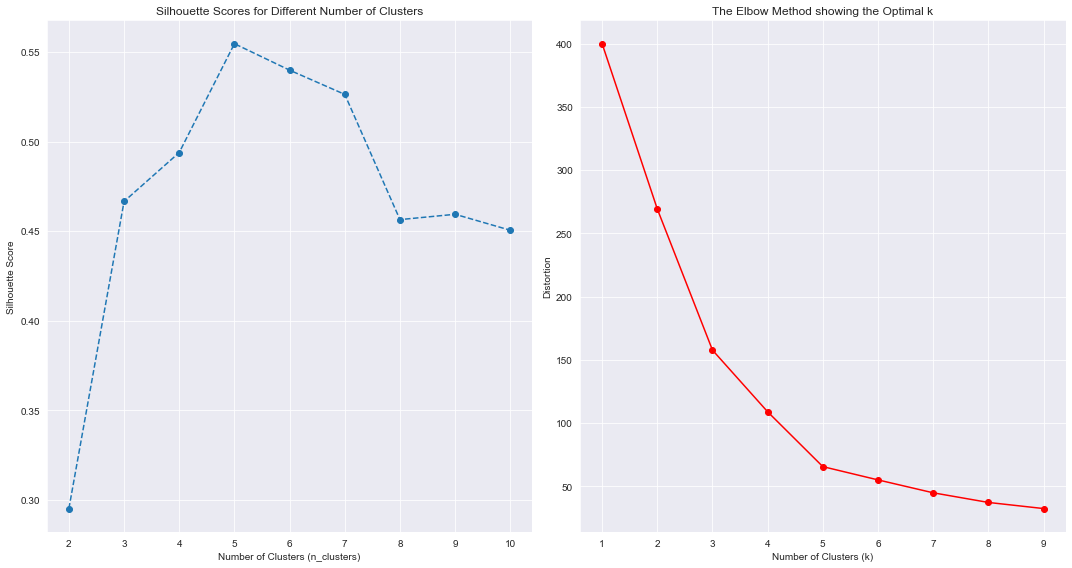

In [325]:
n_clusters_selection(scaled_features_df[['Income (k$)','Spending Score']])

#### __K-means Clustering__ (n=5) on for __Income(k$)__ and __How Much Customers Spent__





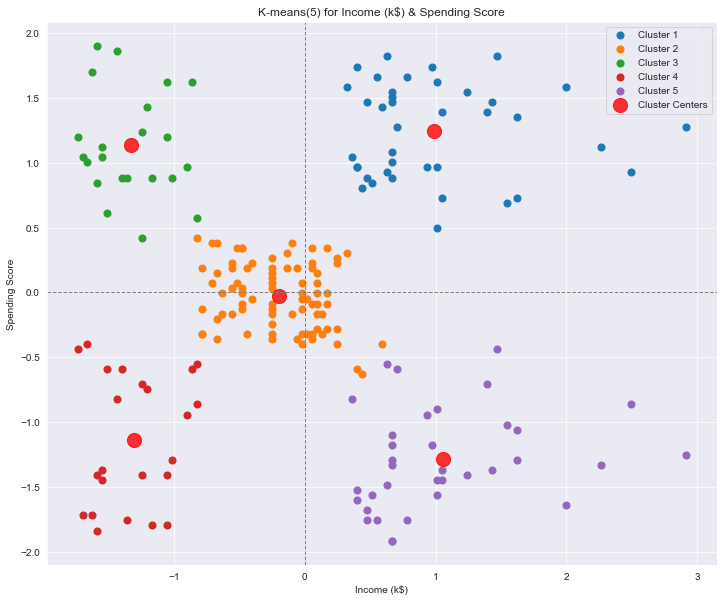

In [16]:
Kmeans_cluster(scaled_features_df[['Income (k$)', 'Spending Score']], 5)


#### Based on the plot, we can interpret the clusters as:
- Cluster 1: Customers with both __medium__ spent amount and yearly income

- Cluster 2: Customers with both __high__ spent amount and yearly income
- Cluster 3: Customers with __low__ spent amount but __high__ yearly income
- Cluster 4: Customers with  __high__ spent amount but __low__ yearly income
- Cluster 5: Customers with both __low__ spent amount and yearly income
#### However, these insights are __not enough__ to describe the __full characteristics__ of customer clusters as we __did not__ include __Age and Gender__ for this clustering

### Using __Silhouette Scores__ and __Elbow method__ to determine best __No. of clusters__ for Age and How Much Customers Spend
- Although the best silhouette score seen was for __no. clusters = `2`__, it would not capture as much information on customer do we try to compare with __no. clusters = `6`__

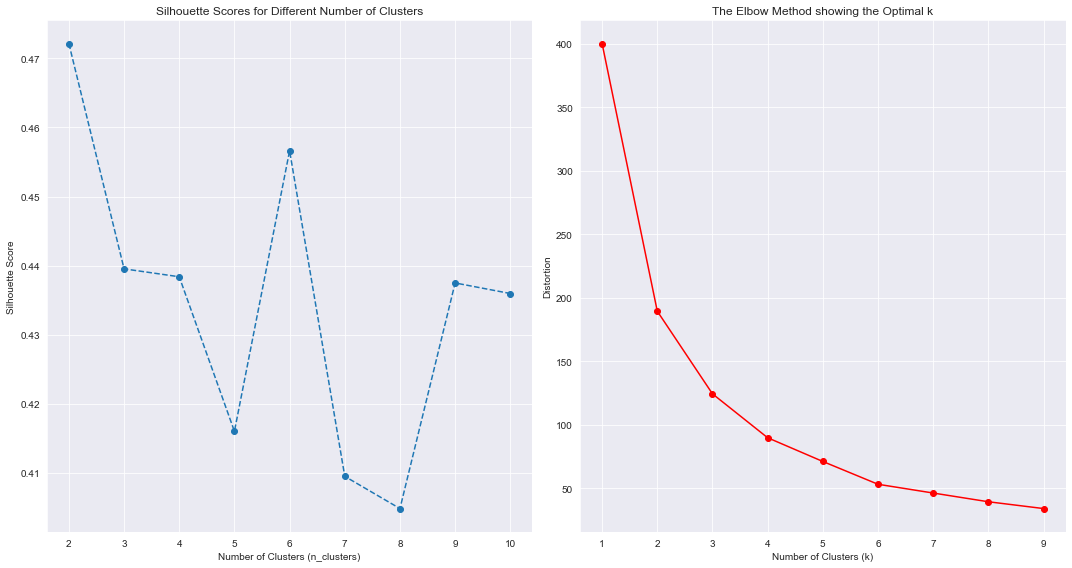

In [17]:
n_clusters_selection(scaled_features_df[['Age', 'Spending Score']])

### __K-means Clustering__ (n=2) vs (n=6) on for Age and How Much Customers Spent
#### For __n = 2__:
- we can see __Cluster 1 (blue)__  representing customers who tends to __`spends more`__ and are of __`younger age`__ 
- While __Cluster 2 (Orange)__ represents customers who tends to __`spends less`__ and __most__ of them are of __`older age`__
___

<!-- #### For __n = 6__: 
we can see clusters are generally split into more __specific groups__ :
- __Cluster 1 (Blue)__: have a __`medium spend`__ , __`middle age`__

- __Cluster 2 (Orange)__: have a __`medium spend`__ , __`younger age`__
- __Cluster 3 (Green)__: have a __`higher spend`__ , __`older age`__
- __Cluster 4 (Red)__: have a __`lower spend`__ , __`younger age`__
- __Cluster 5 (Purple)__: have a __` lower spend`__ , __`middle to older age`__
- __Cluster 6 (Brown)__: have a __`medium spend`__ , __`older age`__

_The terms 'younger','middle','older' all are relative to the clusters/groups_ -->

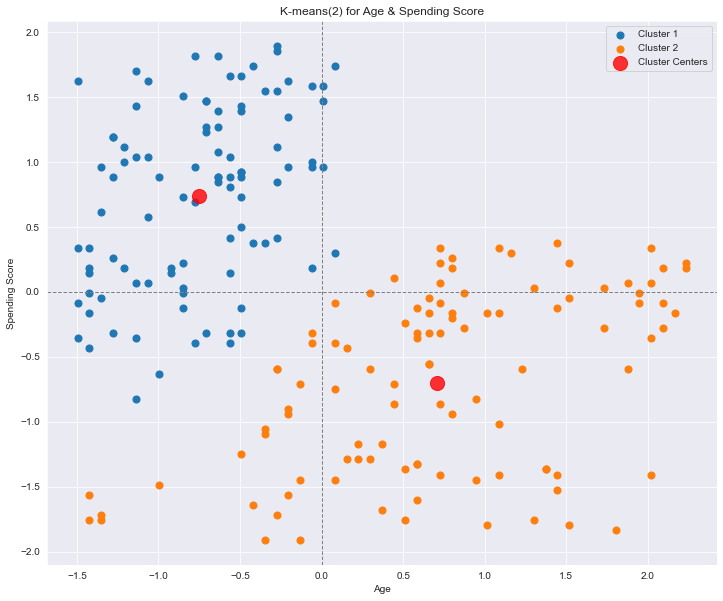

In [18]:
Kmeans_cluster(scaled_features_df[['Age', 'Spending Score']], 2)
# Kmeans_cluster(scaled_features_df[['Age', 'Spending Score']], 6)

### Using __Silhouette Scores__ and __Elbow method__ to determine best __No. of clusters__ for Age and Income(k$)
- We would select __no. of clusters__ to be __`3`__ for our K-means clustering as its was the highest
- Additionally, the __Elbow plot__ also shows an elbow at __`k=3`__

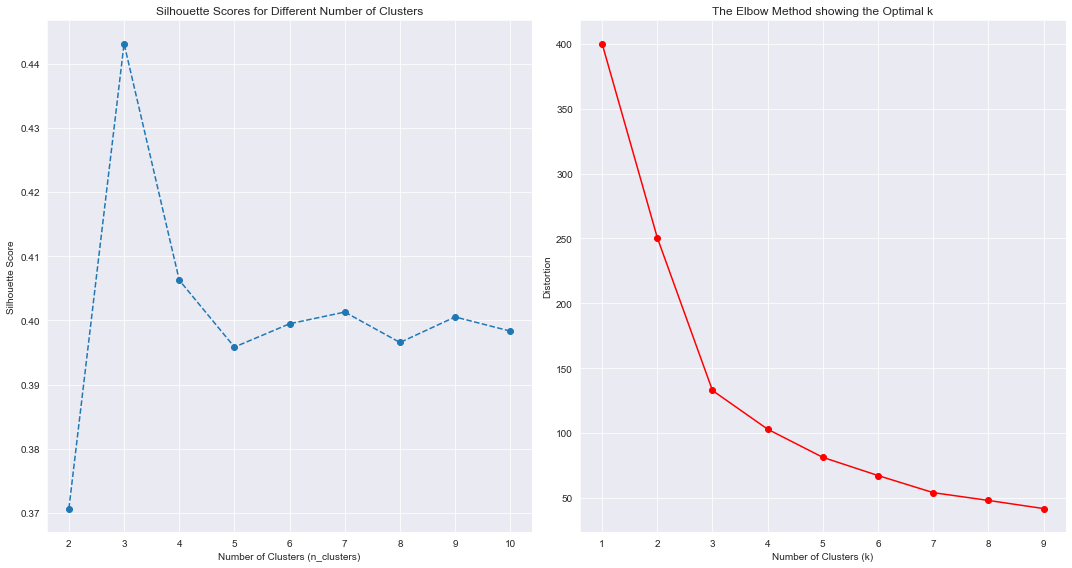

In [19]:
n_clusters_selection(scaled_features_df[['Age', 'Income (k$)']])

### __K-means Clustering__ (n=3) on for Age and Income



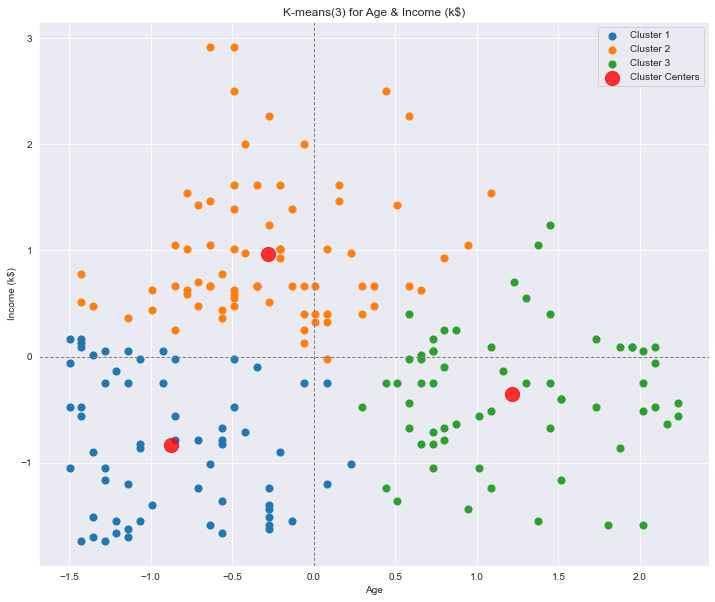

In [20]:
Kmeans_cluster(scaled_features_df[['Age', 'Income (k$)']], 3)




- __Cluster 1 (blue)__: __`lower income, younger customers`__ 
- __Cluster 2 (orange)__: __`lower income, older customers`__ 
- __Cluster 3 (blue)__: __`higher income, younger to older customers`__ 

## Clustering for with 3 Features
- Previously, we only performed Clustering with __`2 out of 3`__ features at one time (2D Clustering) which gave us __insights__ on the characteristics of customers __based on__ those __2 features__ only.
-  __However__, we did not consider the bigger picture which is Clustering all 3 Features __Age,Income (k$) and How Much They Spent__, which should provide us with __more information__ and __characteristics__ of the customers
- This would allow us to perform __Customer Segregation__ much more __accurately__

### K-means Clusters Selection
- Both the __silhouette score plot__ seems to suggest __k=6__ as the best no. of clusters 
- It is __not as clear__ from the __Elbow__ plot where is the elbow, possibly at __k = 4__

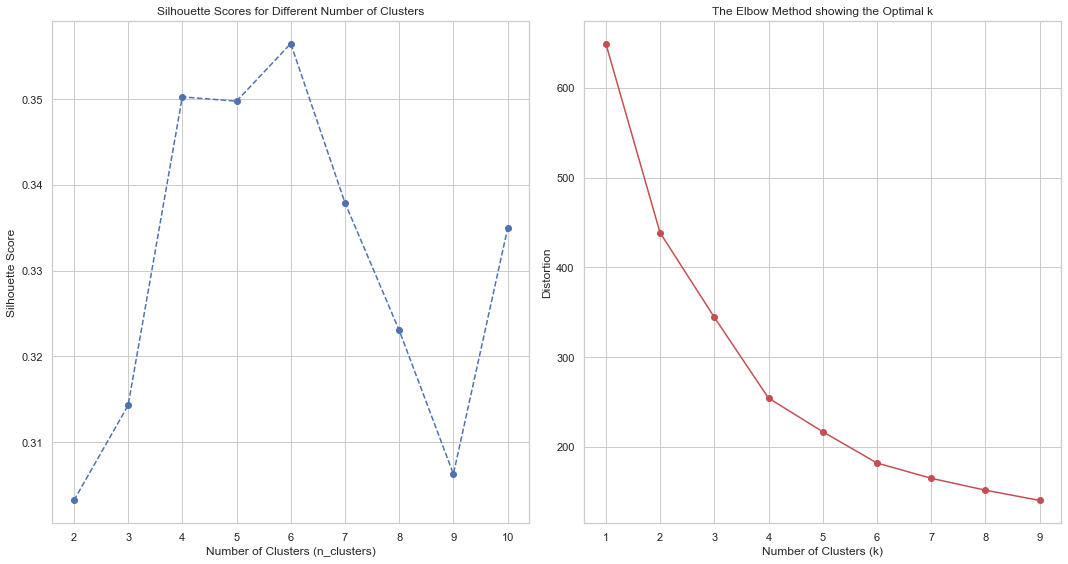

In [612]:
n_clusters_selection(scaled_features_df)


### Using DBI score
- I decided to use __Davies Bouldin index__ to help validate best number of clusters
- Which is the `ratio` __between the cluster scatter__ and the __cluster's separation__
- A __lower score__ indicates a better cluster

In [22]:
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans
import numpy as np

dbi_scores = []

for n_clusters in range(2, 7):
    kmeans = KMeans(n_clusters=n_clusters).fit(scaled_features_df)
    labels = kmeans.labels_
    dbi_score = davies_bouldin_score(scaled_features_df, labels)
    dbi_scores.append((n_clusters, dbi_score))

dbi_scores.sort(key=lambda x: x[1])

for n_clusters, score in dbi_scores:
    print(f'DBI score ({n_clusters} clusters): {score}')

DBI score (6 clusters): 1.0050904211940694
DBI score (5 clusters): 1.024522792115065
DBI score (4 clusters): 1.0650090503369551
DBI score (3 clusters): 1.1523964139934852
DBI score (2 clusters): 1.360702395965753


### Hierarchical Clustering 


In [23]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    



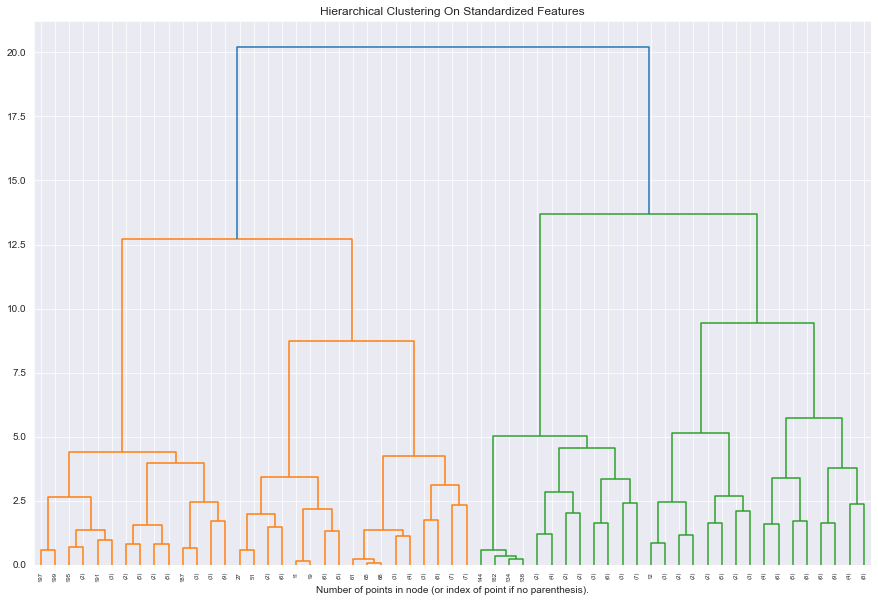

In [24]:
X = scaled_features_df
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.figure(figsize=(15,10))
plt.title("Hierarchical Clustering On Standardized Features")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

### K-Means (n=6) Visualization
- For the 3d plot, i would be using __Plotly's 3D scatter plot__

In [25]:
from sklearn.cluster import KMeans

KMeans_6_df = scaled_features_df.copy()

KMeans_6 = KMeans(n_clusters=6, random_state=42)
y_kmeans = KMeans_6.fit_predict(scaled_features_df)

# Add the cluster labels to new df
KMeans_6_df['Cluster'] = y_kmeans+1

In [626]:
import plotly.express as px
import plotly.graph_objects as go

KMeans_6_df= KMeans_6_df.sort_values(by='Cluster')
# Converting the cluster labels to strings so that we can see the legend for each clusters
KMeans_6_df['Cluster'] = KMeans_6_df['Cluster'].astype(str)

fig = px.scatter_3d(KMeans_6_df, x='Age', y='Income (k$)', z='Spending Score', color='Cluster',
                    opacity=0.9)

# Adding cluster centers of each cluster
cluster_centers = KMeans_6.cluster_centers_
fig.add_trace(go.Scatter3d(
    x=cluster_centers[:, 0],
    y=cluster_centers[:, 1],
    z=cluster_centers[:, 2],
    mode='markers',
    marker=dict(size=10,color='yellow'),
    name='Cluster Centers'
))
# We dont want the color bar 
fig.update_layout(
        coloraxis_showscale=False,
        title=f"K-means (6) for Age, Income, and Spending Score",
    )

fig.show()


In [27]:
#Resources refered
#https://plotly.com/python/v3/3d-point-clustering/
#
#3D Clustering with plotly
import plotly.graph_objects as go
from sklearn.cluster import KMeans

def Kmeans_cluster_3d_plotly(X, n_clusters):
    model = KMeans(n_clusters=n_clusters, random_state=42)
    model.fit(X)

    y_kmeans = model.predict(X)

    fig = go.Figure()

    # Plot each cluster separately and set custom colors for each cluster
    for i in range(n_clusters):
        cluster_mask = y_kmeans == i
        cluster_data = X.iloc[cluster_mask]
        fig.add_trace(go.Scatter3d(
            x=cluster_data[X.columns[0]],
            y=cluster_data[X.columns[1]],
            z=cluster_data[X.columns[2]],
            mode='markers',
            marker=dict(size=5),
            name=f'Cluster {i+1}'
        ))

    centers = model.cluster_centers_
    fig.add_trace(go.Scatter3d(
        x=centers[:, 0],
        y=centers[:, 1],
        z=centers[:, 2],
        mode='markers',
        marker=dict(size=8, color='yellow'),
        name='Cluster Centers'
    ))

    fig.update_layout(
        scene=dict(
            xaxis_title=X.columns[0],
            yaxis_title=X.columns[1],
            zaxis_title=X.columns[2]
        ),
        title=f"K-means ({n_clusters}) for {X.columns[0]}, {X.columns[1]}, and {X.columns[2]}",
        showlegend=True
    )

    fig.show()

Kmeans_cluster_3d_plotly(scaled_features_df, n_clusters=6)


### Interpretation Of the 3D K-Means clustered plot
<table>
  <tr>
    <th>Cluster</th>
    <th>Spending Score</th>
    <th>Income</th>
    <th>Age</th>
  </tr>
  <tr>
    <td>Cluster 1 (Dark Blue)</td>
    <td>High</td>
    <td>Low</td>
    <td>Younger</td>
  </tr>
  <tr>
    <td>Cluster 2 (Red)</td>
    <td>Middle</td>
    <td>Medium</td>
    <td>Older</td>
  </tr>
  <tr>
    <td>Cluster 3 (Green)</td>
    <td>Low</td>
    <td>High</td>
    <td>Varying</td>
  </tr>
  <tr>
    <td>Cluster 4 (Purple)</td>
    <td>Middle</td>
    <td>Medium</td>
    <td>Younger</td>
  </tr>
  <tr>
    <td>Cluster 5 (Orange) <b>Favorable</b> </td>
    <td>High</td>
    <td>High</td>
    <td>Younger</td>
  </tr>
  <tr>
    <td>Cluster 6 (Cyan)</td>
    <td>Low</td>
    <td>Low</td>
    <td>Low</td>
  </tr>
</table>

- Regarding the mall's __most valuable customer group__,based on the K-Means Clustering it would be __Cluster 5 (Orange Cluster)__, as they exhibit characteristics of having __High income__, __Younger__, and __High Spending Score__


## 3D Clustering using GMM
- As compared to the __K-means__ clustering, __`GMM`__ do not perform __hard clustering__ as it assigns __probabilities__ to each data point belonging to each cluster
- For `GMM` model, we can use the __BIC__ elbow score plot to help us determine best n values. The __lower__ the better


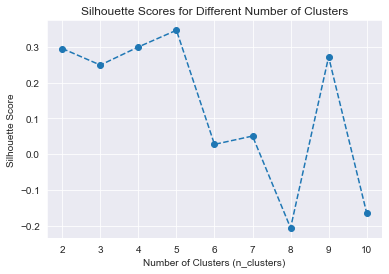

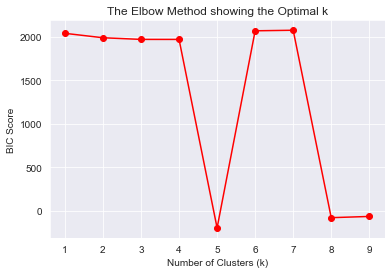

In [126]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

def sil_score_gmm(X):
    n_clusters_list = []  
    silhouette_scores = []  
    
    for k in range(2, 11):
        model = GaussianMixture(n_components=k)
        labels = model.fit_predict(X)
        sil_coeff = silhouette_score(X, labels, metric='euclidean')
        n_clusters_list.append(k)
        silhouette_scores.append(sil_coeff)

    plt.plot(n_clusters_list, silhouette_scores, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters (n_clusters)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores for Different Number of Clusters')
    plt.xticks(range(2, 11))  
    plt.grid(True)
    plt.show()
    
def Elbow_plot_gmm(X):
    bic_scores = []  
    K = range(1, 10)
    
    for k in K:
        GMMModel = GaussianMixture(n_components=k)
        GMMModel.fit(X)
        bic_scores.append(GMMModel.bic(X))  # Using BIC scores
    
    plt.plot(K, bic_scores, 'ro-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('BIC Score')
    plt.title('The Elbow Method showing the Optimal k')
    plt.grid(True)


sil_score_gmm(scaled_features_df)
Elbow_plot_gmm(scaled_features_df)


- Since The __Silhouette Score__ is __highest__ at n = 5 and __BIC Score__ was lowest at n = 5, we would select __no. of clusters to be 5__ for the `GMM` Clustering Model

### DBI 

In [128]:
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

import numpy as np

dbi_scores = []

for n_clusters in range(2, 10):
    Gmm= GaussianMixture(n_components=n_clusters,random_state=42).fit(scaled_features_df)
    labels = Gmm.predict(scaled_features_df)
    dbi_score = davies_bouldin_score(scaled_features_df, labels)
    dbi_scores.append((n_clusters, dbi_score))

dbi_scores.sort(key=lambda x: x[1])

for n_clusters, score in dbi_scores:
    print(f'DBI score ({n_clusters} clusters): {score}')

DBI score (6 clusters): 1.0297531466094896
DBI score (5 clusters): 1.0987426770405024
DBI score (8 clusters): 1.127099323858872
DBI score (4 clusters): 1.1287054848478255
DBI score (9 clusters): 1.191884923272169
DBI score (3 clusters): 1.1961822765209413
DBI score (2 clusters): 1.3669336225603825
DBI score (7 clusters): 1.777834583671494


### GMM (5) Model Visualization

In [129]:
from sklearn.mixture import GaussianMixture

GMM_5_df = scaled_features_df.copy()

GMM_5 = GaussianMixture(n_components=5, random_state=42).fit(scaled_features_df)

# Predict the cluster labels for each data point
cluster_labels = GMM_5.predict(scaled_features_df)

# Add the cluster labels to the DataFrame
GMM_5_df['Cluster'] = cluster_labels + 1

In [420]:
import plotly.express as px
import plotly.graph_objects as go



GMM_5_df = GMM_5_df.sort_values(by='Cluster')

# Converting the cluster labels to strings for legend display
GMM_5_df['Cluster'] = GMM_5_df['Cluster'].astype(str)


fig = px.scatter_3d(GMM_5_df, x='Age', y='Income (k$)', z='Spending Score', color='Cluster',
                    opacity=0.8, size_max=10)

# Adding cluster centers 
cluster_centers = GMM_5.means_
fig.add_trace(go.Scatter3d(
    x=cluster_centers[:, 0],
    y=cluster_centers[:, 1],
    z=cluster_centers[:, 2],
    mode='markers',
    marker=dict(size=10, color='yellow'),
    name='Cluster Centers'
))

# We do not want the color bar
fig.update_layout(
    coloraxis_showscale=False,
    title="GMM Clustering (5 Clusters) for Age, Income, and Spending Score"
)

# Show the plot
fig.show()


<table>
  <tr>
    <th>Cluster</th>
    <th>Spending Score</th>
    <th>Income</th>
    <th>Age</th>
  </tr>
  <tr>
    <td>Cluster 1 (Dark Blue)</td>
    <td>Middle</td>
    <td>Middle</td>
    <td>Average to older</td>
  </tr>
  <tr>
    <td>Cluster 2 (Red)<b>Favorable</b></td>
    <td>High</td>
    <td>High </td>
    <td>Younger</td>
  </tr>
  <tr>
    <td>Cluster 3 (Green)</td>
    <td>Low to High</td>
    <td>Low to High</td>
    <td>Younger</td>
  </tr>
  <tr>
    <td>Cluster 4 (Purple)</td>
    <td>Low</td>
    <td>High</td>
    <td>Varying</td>
  </tr>
  <tr>
    <td>Cluster 5 (Orange)</td>
    <td>Low</td>
    <td>High</td>
    <td>Varying</td>
  </tr>
</table>


## Dimension Reduction Using PCA for Clustering
-Principal Component Analysis (PCA) applied to this data identifies the 
combination of attributes that account for the __most variance__ in the 
data.


- We want to __reduce__ the __no. of dimensions__ from 3 (Age,Income,How much they spend) to 2 if possible while retaining as much information
- This allows us to perform __clustering__ on the 2 dimensions
- We would have to perform feature scaling using __StandardScaler()__ before performing PCA

In [34]:
import plotly.express as px
from sklearn.cluster import KMeans
#Functions for PCA/plots

def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    #PCA eigenvalues
    ev = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(ev, 4), columns = ['Eigenvalue']) 
    eigenvalues.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Return a concatenated DataFrame
    return pd.concat([eigenvalues, variance_ratios, components], axis = 1)




def loadingplot(data, pca, width=5, height=5, margin=0.5):

    fig, ax = plt.subplots(figsize = (width,height))

    #Set limits for figure
    x_min = min(pca.components_[0,:].min(),0)-margin
    x_max = max(pca.components_[0,:].max(),0)+margin
    y_min = min(pca.components_[1,:].min(),0)-margin
    y_max = max(pca.components_[1,:].max(),0)+margin

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    #Scaling factor for text position
    text_pos = 0.1

    for i, v in enumerate(pca.components_.T):
        ax.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.1, linewidth=2, color='red')
        ax.text(v[0], v[1]+text_pos, data.columns[i], color='black', fontsize=11)

    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    ax.set_xlabel("PC1", fontsize=14)
    ax.set_ylabel("PC2", fontsize=14)
    ax.set_title("Loading plot", fontsize = 14)
    
    return ax




def scoreplot_label(data, scores, pca,hue=None,style=None, width=5, height=5, margin=0.5):
    plt.figure(figsize=(width, height))
    ax = sns.scatterplot(x="PC1", y="PC2", hue=hue, style=style, data=scores)
    
    text_pos = 0.5
    
    # Set limits for figure
    x_min = min(scores['PC1'].min(),0)-margin
    x_max = max(scores['PC1'].max(),0)+margin
    y_min = min(scores['PC2'].min(),0)-margin
    y_max = max(scores['PC2'].max(),0)+margin
  
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title("Score plot", fontsize=14)
    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    
    return ax




### Implementing PCA 

In [35]:
scaled_df_pca = scaled_features_df.drop(columns='Gender')

In [36]:
# implementing PCA using sklearn

from sklearn.decomposition import PCA

pca = PCA(n_components=3).fit(scaled_df_pca)

pca_samples = pca.transform(scaled_df_pca)



## Interpreting Principal Components / PCA Results

#### __`PC1`__ = 0.7064 Age - 0.0480 Income - 0.7062 How Much They Spend 
- __PC1__ seems to explain the general __spending behavior__ across __different age groups__,having __little emphasis on Income__ and higher emphasis on __Age__ and __How Much They Spend__ which has a __negative loading__

- Positive __PC1__ score would be caused by __`above average age`__, __`high/low income`__, __`below average spent`__ 

_(since below average spend causes a negative z-score value times the coefficient 'How Much They Spend' which is also negative , resulting in a positive value)_
- Negative __PC1__ score would be caused by __`below average age, high/low income, above average spent`__ 

___
#### __`PC2`__	= 0.0301 Age + 0.9988 Income - 0.0378 How Much They Spend 
- __PC2__ seems to have __major emphasis__ on __Income(k$)__ as it's coefficient was 0.9988, which is very close to 1. This implies that both __Age__ and __How Much They Spend__ would be relatively insignificant in affecting the score of __PC2__
- Positive __PC2__ score would be mostly caused by __above average Income__,  __varrying spent and age__ 
- Negative __PC2__ score would be mostly caused by __below average Income__, __varrying spent and age__


__Note:__
- We would leave out PC3 as __both PC1 and PC2__ can already explain __0.7738 of the total variance__, and __both their eigenvalues > 1__ except for __PC3's eigenvalues = 0.6761 < 1__. 
- Based on kaiser's rule, we shall leave out PC3

In [37]:
PCA_results = pca_results(scaled_df_pca, pca) 


In [38]:
PCA_results

,Eigenvalue,Explained Variance,Age,Income (k$),Spending Score
PC 1,1.3347,0.4427,0.7064,-0.0480,-0.7062
PC 2,1.0043,0.3331,0.0301,0.9988,-0.0378
PC 3,0.6761,0.2243,-0.7072,-0.0054,-0.7070


In [39]:
#Extract only the two PCs
pca2 = PCA(n_components=2).fit(scaled_df_pca)
scores2 = pca2.transform(scaled_df_pca)


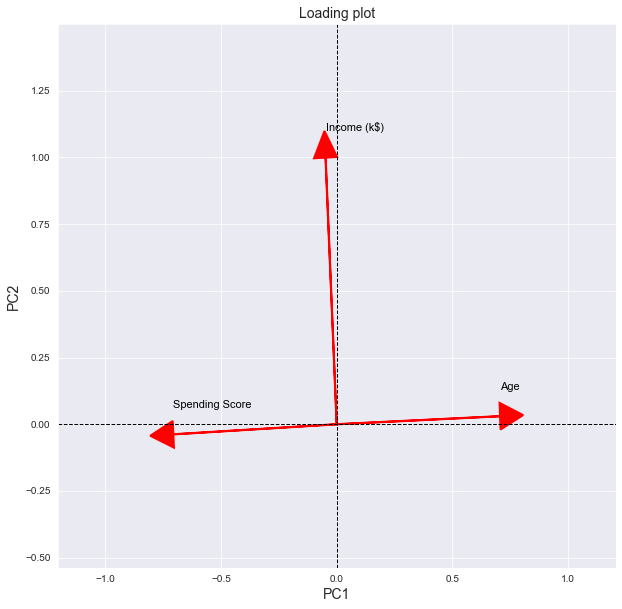

In [40]:
## Loading plot
plt.clf
ax2 = loadingplot(scaled_df_pca,pca2,width=10,height=10)
plt.show()

In [41]:
#Obtain scores from original data that are not centred 

scores2_notcentred = np.dot(scaled_features_df, PCA(2).fit(scaled_features_df).components_.T)
scores2_notcentred_df = pd.DataFrame(scores2_notcentred, columns = ['PC1','PC2'])
scores2_notcentred_df['Gender'] = scaled_features_df['Gender']
scores2_notcentred_df = scores2_notcentred_df[['Gender','PC1', 'PC2']]
scores2_notcentred_df.head(10)

,Gender,PC1,PC2
0,0,-0.621347,-1.759273
1,0,-1.670795,-1.811218
2,1,0.294472,-1.714866
3,1,-1.498898,-1.803410
4,1,-0.081454,-1.700785
5,1,-1.523871,-1.765900
6,1,1.051112,-1.609832
7,1,-1.968098,-1.749784
8,0,2.638366,-1.472558
9,1,-1.012320,-1.669005


### Plotting the scoreplot with Gender as hue
- Male 0, Female 1
- We can plot a scoreplot to visualize the distribution of __female and male__ customers in the __reduced-dimensioned data__
- As expected, the score plot suggests that __Gender__ would __not be a significant factor__ in customer's __Spending Behavior__ as both __male and female__ customers are __scattered relatively equally__ throughout the plot

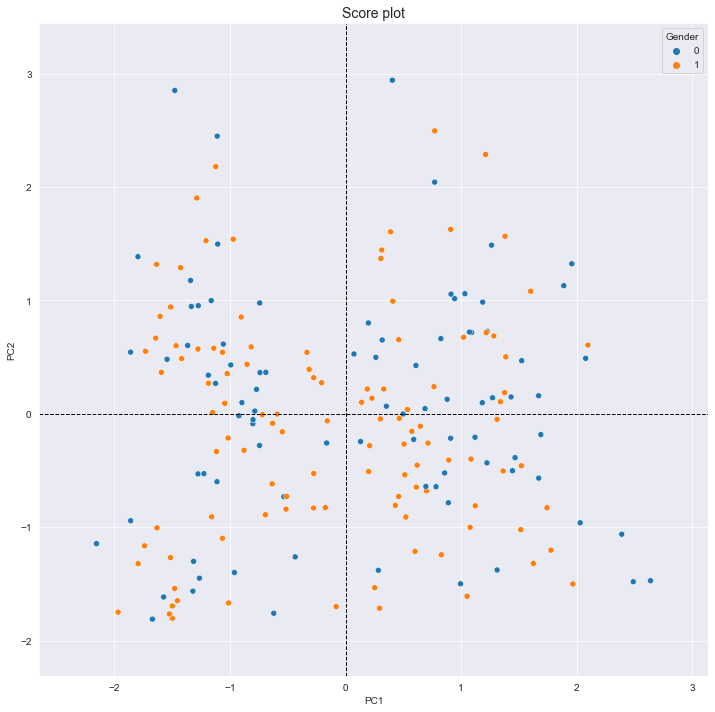

In [42]:
plt.clf
ax3 = scoreplot_label(df, scores2_notcentred_df, pca2,hue='Gender',width=12,height=12)
plt.show()


In [43]:
scores2_notcentred_df.drop(columns='Gender',inplace=True) #dont want gender for clustering

### Using __Silhouette Scores__ and __Elbow method__ to determine best __No. of clusters__

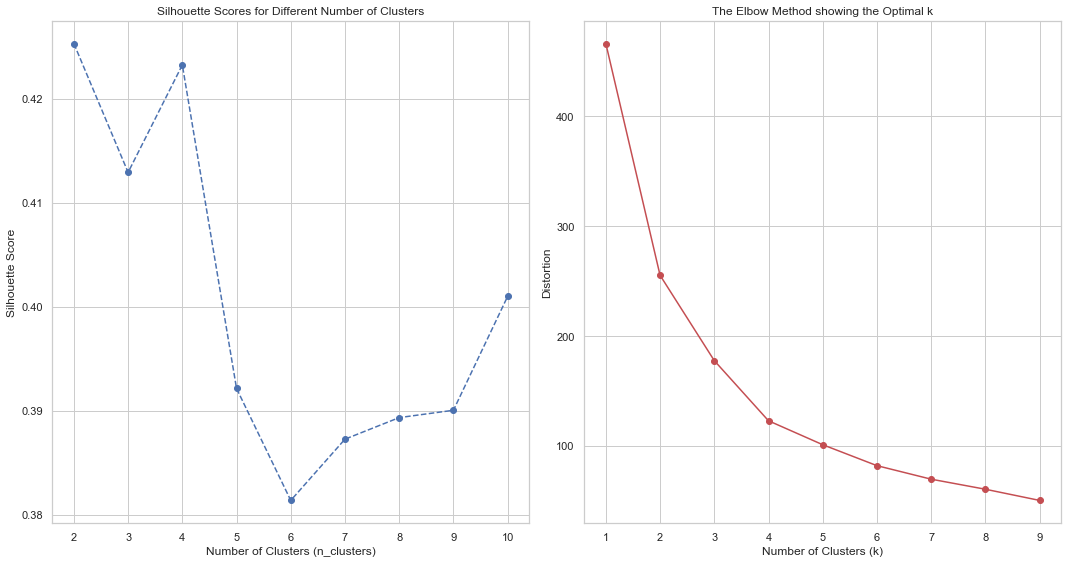

In [608]:
n_clusters_selection(scores2_notcentred_df)


- We can see that __n = 2__ would be the best option, however __n = 4__ could be possible as well and would give more __specific characteristics__ to the clusters

### DBI score
- `ratio` __between the cluster scatter__ and the __cluster's separation__
- A __lower score__ indicates a better cluster
- Here, we observe __K=4__ as the lowest option

In [46]:
kmeans = KMeans(n_clusters=2).fit(scores2_notcentred_df)
labels = kmeans.labels_
kmeans1 = KMeans(n_clusters=4).fit(scores2_notcentred_df)
labels1 = kmeans1.labels_
kmeans2 = KMeans(n_clusters=6).fit(scores2_notcentred_df)
labels2 = kmeans2.labels_

dbi_score = davies_bouldin_score(scores2_notcentred_df, labels)
dbi_score1 = davies_bouldin_score(scores2_notcentred_df, labels1)
dbi_score2 = davies_bouldin_score(scores2_notcentred_df, labels2)


print(f'K-means (2): {dbi_score}')
print(f'K-means (4): {dbi_score1}')
print(f'K-means (6): {dbi_score2}')

K-means (2): 0.9587773913654658
K-means (4): 0.8223751112625666
K-means (6): 0.8588968694863369


### __K-means Clustering__ (n=2,n=4) on reduced dataset

- Older (Above average age)
- Younger (Below average age)
- Lower income/spent amount (Below average income/spending)
- Higher income/spent amount (Above average income/spending)
<br>
<br>


### General Characteristics Of Each of the 4 Quadrants 

| Quadrant      | PC1 Score  | PC2 Score  | Age      | Spending Score    | Income      |
|---------------|------------|------------|----------|------------------|-------------|
| Bottom Right  | Positive   | Negative   | Older    | Lower            | Lower       |
| Bottom Left   | Negative   | Negative   | Younger  | Higher           | Lower       |
| Top Right     | Positive   | Positive   | Older    | Lower            | Higher      |
| Top Left      | Negative   | Positive   | Younger  | Higher           | Higher      |




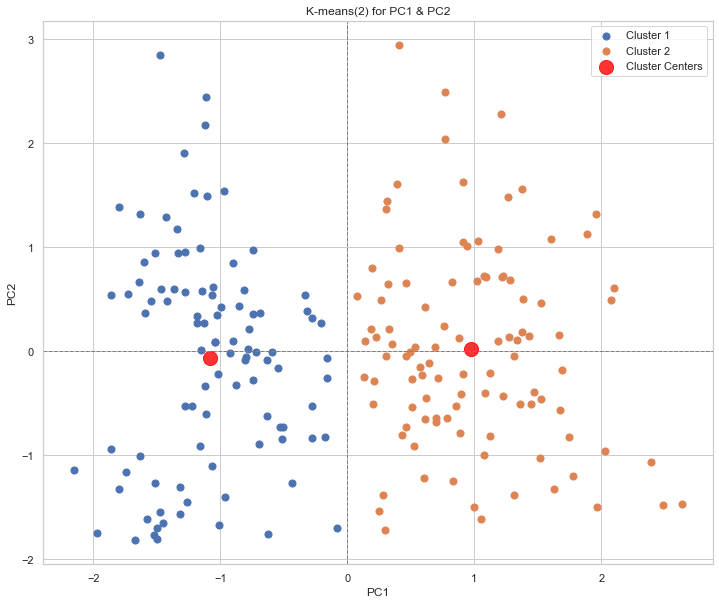

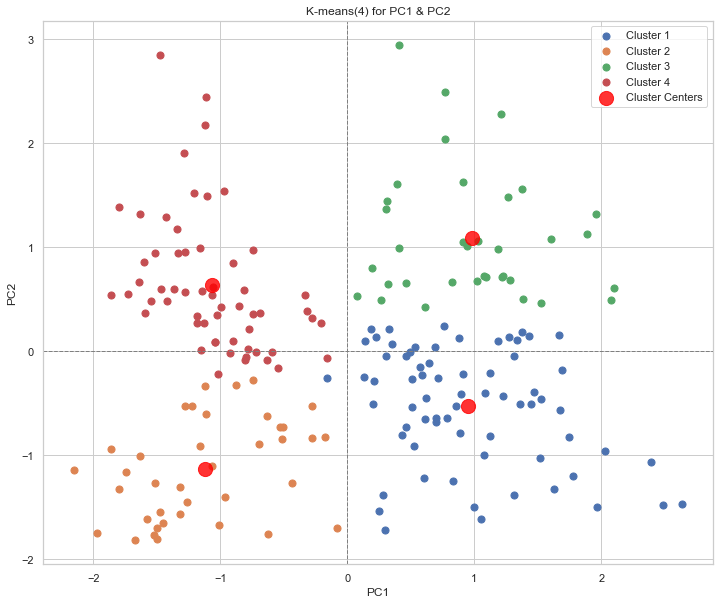

In [609]:
Kmeans_cluster(scores2_notcentred_df,2)
Kmeans_cluster(scores2_notcentred_df,4)

- For __K-Means n=2__, we can see quite a separation, as __Cluster 1 (blue)__ can be observed on the __left quadrant__, while __Cluster 2(Orange)__ was on the __right quadrant__
- However, the Clusters doesn't seem to be closely grouped as well

### 3D Plot for PCA (components = 3)
- Wanted to visualize the clusters in 3D space, including __PC3 scores__


In [610]:
import pandas as pd
from sklearn.cluster import KMeans

kmeans1 = KMeans(n_clusters=4, random_state=42)
kmeans_pca_labels = kmeans1.fit_predict(scores2_notcentred_df)


K_means_pca = df.copy()
K_means_pca['KMeans_Cluster'] = kmeans_pca_labels


silhouette_avg_pca = silhouette_score(df, kmeans_pca_labels)

# Print the new DataFrame
print(silhouette_avg_pca)

0.36900984524740366


In [607]:
import plotly.express as px
import plotly.graph_objects as go

# Converting the cluster labels to strings so that we can see the legend for each clusters
K_means_pca['KMeans_Cluster'] = K_means_pca['KMeans_Cluster'].astype(str)

fig = px.scatter_3d(K_means_pca, x='Age', y='Income (k$)', z='Spending Score', color='KMeans_Cluster',
                    opacity=0.9)

# We dont want the color bar 
fig.update_layout(
        coloraxis_showscale=False,
        title=f"Customer Clusters with K-means",
    )

fig.show()



### Hierarchical Clustering / Looking At Dendrogram 

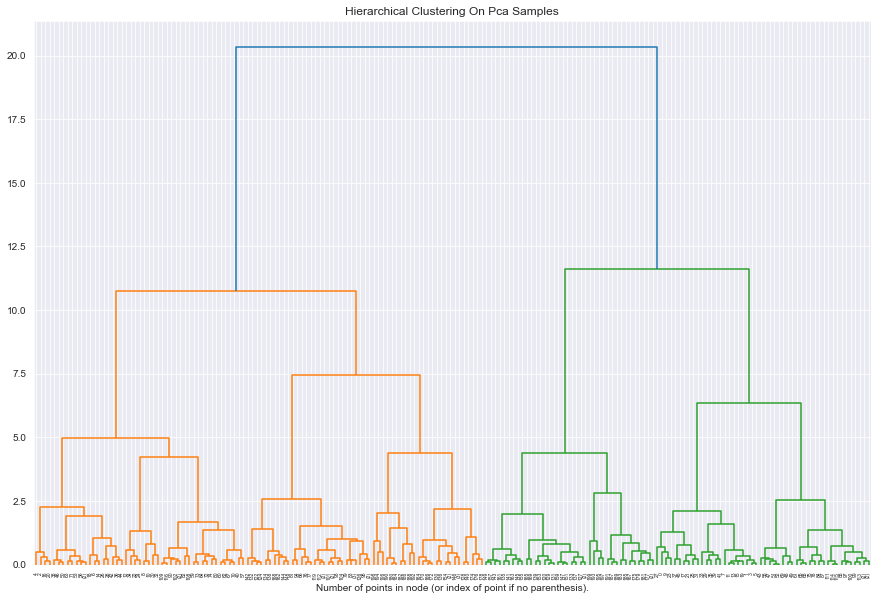

In [173]:


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None,linkage='ward')

model = model.fit(scores2_notcentred_df)
plt.figure(figsize=(15,10))
plt.title("Hierarchical Clustering On Pca Samples")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=8)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

- We can observe 2 distinct clusters being formed from the Dendrogram


### Agglomerative Clustering
- single: based on two closest objects
- complete: based on two farthest objects
- average: based on the arithmetic mean of all objects
- centroid: based on the geometric mean of all objects
- median: based on the median of all objects
- ward: based on the sum of squares

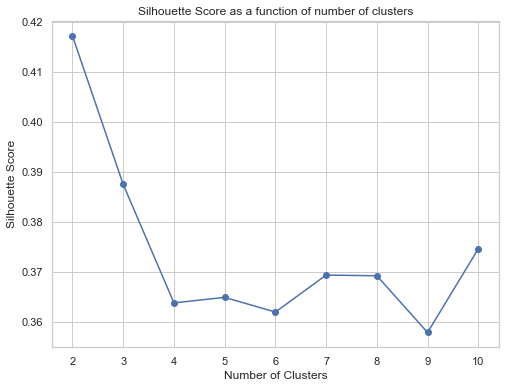

In [417]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# Assuming you have a DataFrame named df with columns 'PC1' and 'PC2'
X =  scores2_notcentred_df.values

# Range of clusters to try
cluster_range = range(2, 11)
silhouette_scores = []

for n_clusters in cluster_range:
    agc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    labels = agc.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score as a function of number of clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


Best Silhouette Score: 0.42
Best Davies-Bouldin Index: 0.97


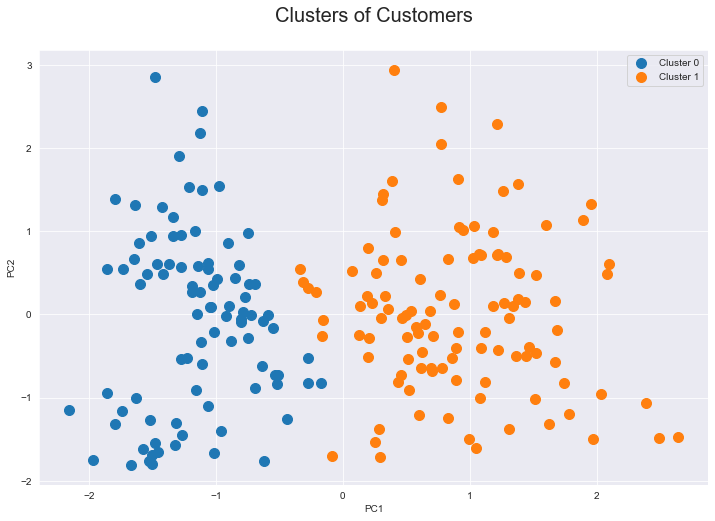

Best Parameters: {'n_clusters': 2}


In [172]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.model_selection import GridSearchCV

# Create an AgglomerativeClustering instance
agc = AgglomerativeClustering(affinity='euclidean', linkage='ward')

# Define the parameter grid
param_grid = {'n_clusters': np.arange(2, 11)}

# Create GridSearchCV instance
grid_search = GridSearchCV(agc, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X = scaled_features_df[['Income (k$)','Spending Score']].values)  # Replace X with your data

# Get the best estimator and its parameters
best_agc = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predict cluster labels
best_labels = best_agc.fit_predict(X)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, best_labels)
print(f"Best Silhouette Score: {silhouette_avg:.2f}")

# Calculate Davies-Bouldin Index
davies_bouldin_avg = davies_bouldin_score(X, best_labels)
print(f"Best Davies-Bouldin Index: {davies_bouldin_avg:.2f}")

# Plot clusters
plt.figure(figsize=(12, 8))
for cluster in np.unique(best_labels):
    plt.scatter(X[best_labels == cluster, 0], X[best_labels == cluster, 1], label=f'Cluster {cluster}', s=100)
plt.legend(loc='best')
plt.title('Clusters of Customers\n ', fontsize=20)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

print("Best Parameters:", best_params)


# PCA Conclusions
- Overall, 

### Gaussian Mixture Model 


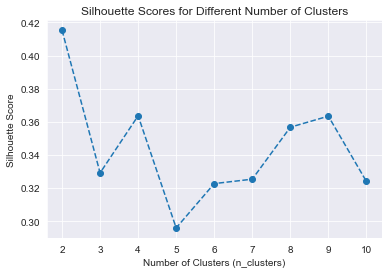

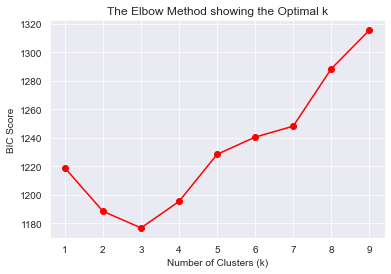

In [51]:


sil_score_gmm(scores2_notcentred_df)
Elbow_plot_gmm(scores2_notcentred_df)

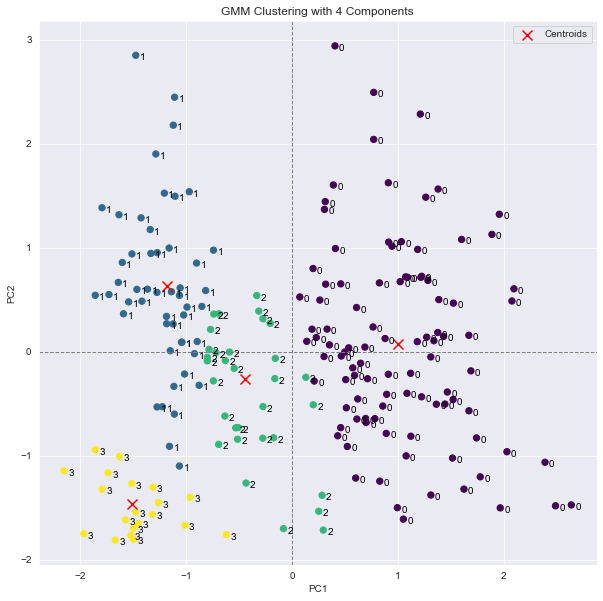

[[0.023 0.202 0.294 0.482]
 [0.    0.001 0.    0.999]
 [0.499 0.    0.501 0.   ]
 [0.    0.002 0.001 0.997]
 [0.238 0.006 0.755 0.001]
 [0.    0.002 0.001 0.998]
 [0.921 0.    0.079 0.   ]
 [0.    0.    0.    1.   ]
 [1.    0.    0.    0.   ]
 [0.    0.051 0.019 0.93 ]]


In [333]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

gmm = GaussianMixture(n_components=4, random_state=42).fit(scores2_notcentred_df)

labels = gmm.predict(scores2_notcentred_df)
centroids = gmm.means_

plt.scatter(scores2_notcentred_df.iloc[:, 0], scores2_notcentred_df.iloc[:, 1], c=labels, s=40, cmap='viridis')

for i, label in enumerate(labels):
    plt.annotate(str(label), (scores2_notcentred_df.iloc[i, 0], scores2_notcentred_df.iloc[i, 1]), fontsize=10, color='black', xytext=(4, -5), textcoords='offset points')

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('GMM Clustering with 4 Components')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.show()

probs = gmm.predict_proba(scores2_notcentred_df)
print(probs[:10].round(3))

from sklearn.metrics import davies_bouldin_score



## Dimension Reduction with TSNE

- __PCA__ did not work as well as based on the __scoreplots__, the points were scattered out with no __distinct__ formation of clusters
- `t-SNE` is more effective for __non-linear__ variables,which in this case is a good match since __age and income__ and __income and spending amount__ do not exhibit linearity
- However, `t-SNE` may be harder to interpret as compared to `PCA`
- Therefore, i intend to explore another __Dimension Reduction__ technique `t-SNE`

Parameters of TSNE:
- __n_iter__: The number of iterations that the algo runs
- __perplexity__: number of neighboring points t-SNE must consider

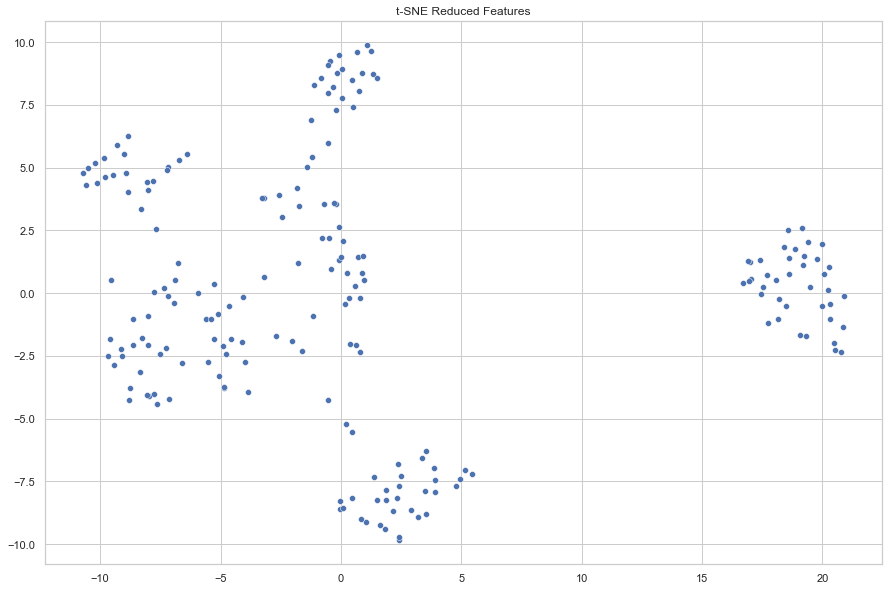

In [616]:
import seaborn as sns
from sklearn.manifold import TSNE

tsne = TSNE()
X_tsne = tsne.fit_transform(df)
plt.figure(figsize=(15,10))
plt.title('t-SNE Reduced Features')
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1])
plt.show()


## DBScan Clustering on reduced dataset after t-SNE


#### Finding __Percentage of Outliers against eps__

In [617]:
from sklearn.cluster import DBSCAN
outliers_percent = []
no_of_outliers = []

# Iterate over different values of eps
for eps in np.arange(0.1, 10, 0.1):
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(X_tsne)
    
    # Count the number of outliers labeled as -1
    no_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    # Calculate the percentage of outliers labeled as -1
    pers_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outliers_percent.append(pers_outliers)


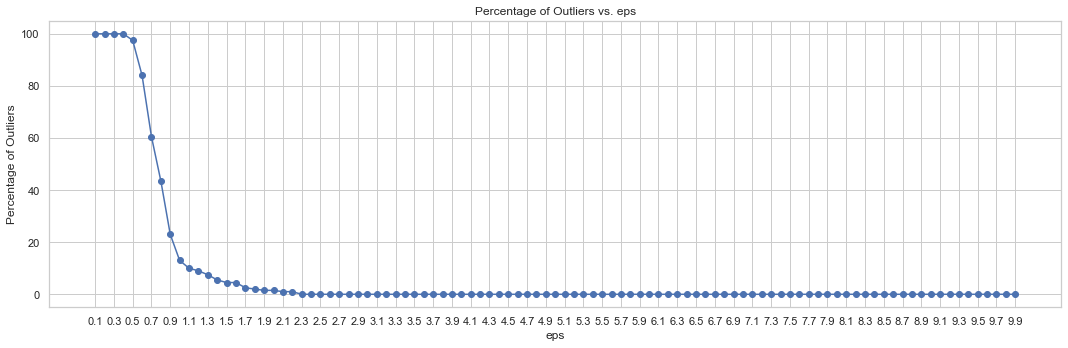

In [618]:
import matplotlib.pyplot as plt

# Plotting the number of outliers
plt.figure(figsize=(15, 5))

plt.plot(np.arange(0.1, 10, 0.1), outliers_percent, marker='o')
plt.xlabel('eps')
plt.ylabel('Percentage of Outliers')
plt.title('Percentage of Outliers vs. eps')

# Set custom tick positions and labels on the x-axis
custom_xticks = np.arange(0.1, 10.1, 0.2)  # Adjust the interval as needed
plt.xticks(custom_xticks)

plt.tight_layout()
plt.show()


- percentage of outliers seem to stay about the same level after __eps = 1.7__

#### Tunning to find best __eps__ and __min samples__

- __eps__: defines how far away other points need to be from the center point to be considered part of the same group or cluster
- __MinPts__ : 2 x D where D is the no. of dimensions

In [619]:
from sklearn.cluster import DBSCAN

X = X_tsne

# range of values for hyperparameters
eps_values = np.arange(0.5, 20, 0.01)
min_samples_values = np.arange(4, 10) # 2 * K where k should be the no. of dimensions which should be 4

best_score = -1
best_eps = None
best_min_samples = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples,metric='euclidean')
        labels = dbscan.fit_predict(X)  
        unique_labels = np.unique(labels)
        
        # Check if there's more than two cluster since we already can kind of tell from above
        if len(unique_labels) > 2:
            score = silhouette_score(X, labels)
            
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f"Best Silhouette Score: {best_score}")
print(f"Best eps: {best_eps}")
print(f"Best min_samples: {best_min_samples}")


Best Silhouette Score: 0.6202685832977295
Best eps: 1.3900000000000008
Best min_samples: 6


In [598]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import numpy as np

X = X_tsne

# Range of values for hyperparameters
eps_values = np.arange(0.5, 20, 0.005)
min_samples_values = np.arange(4, 10) # 2 * K where k should be the number of dimensions, which is 2 in this case

best_score = -1
best_eps = None
best_min_samples = None

best_dbi = np.inf
best_calinski = -np.inf

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
        labels = dbscan.fit_predict(X)
        unique_labels = np.unique(labels)
        
        # Check if there's more than two clusters
        if len(unique_labels) > 2:
            silhouette = silhouette_score(X, labels)
            dbi = davies_bouldin_score(X, labels)
            calinski = calinski_harabasz_score(X, labels)
            
            # Choose the best combination of hyperparameters based on metrics
            if silhouette > best_score:
                best_score = silhouette
                best_eps = eps
                best_min_samples = min_samples
            
            if dbi < best_dbi:
                best_dbi = dbi
                
            if calinski > best_calinski:
                best_calinski = calinski

print(f"Best Silhouette Score: {best_score}")
print(f"Best eps: {best_eps}")
print(f"Best min_samples: {best_min_samples}")
print(f"Best Davies-Bouldin Index: {best_dbi}")
print(f"Best Calinski-Harabasz Score: {best_calinski}")


Best Silhouette Score: 0.5439650416374207
Best eps: 1.670000000000001
Best min_samples: 8
Best Davies-Bouldin Index: 0.5563026916846334
Best Calinski-Harabasz Score: 543.0672135091


In [620]:
#fit best params based on gridsearch
#dbscan = DBSCAN(eps=1.39,min_samples=6,metric='euclidean')
dbscan = DBSCAN(eps = best_eps,min_samples=best_min_samples,metric='euclidean')

labels = dbscan.fit_predict(X_tsne)

new_df = df.copy()

new_df['Cluster'] = labels

# Print the number of clusters
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f'Number of clusters: {n_clusters}')

# number of points in each cluster
print(new_df['Cluster'].value_counts())

print(new_df.head())

Number of clusters: 6
 2    45
 4    39
 5    32
 3    27
 1    22
 0    22
-1    13
Name: Cluster, dtype: int64
   Gender  Age  Income (k$)  Spending Score  Cluster
0       0   19           15              39        1
1       0   21           15              81        0
2       1   20           16               6        1
3       1   23           16              77        0
4       1   31           17              40        1


### Removing outliers detected by DBSCAN

### Analysing Cluster Behaviors

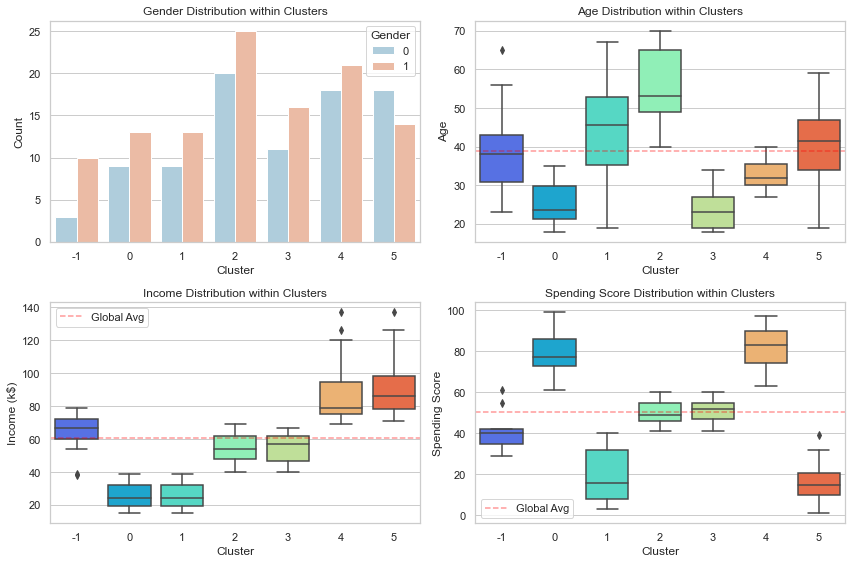

In [621]:


fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Global averages
global_avg_income = new_df['Income (k$)'].mean()
global_avg_spending = new_df['Spending Score'].mean()
global_avg_age = new_df['Age'].mean()

# Gender distribution within clusters
sns.countplot(data=new_df, x='Cluster', hue='Gender', palette='RdBu_r', ax=axes[0, 0])
axes[0, 0].set_title('Gender Distribution within Clusters')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Count')

# Age within clusters
sns.boxplot(data=new_df, x='Cluster', y='Age', palette='rainbow', ax=axes[0, 1])
axes[0, 1].axhline(y=global_avg_age, color='red', linestyle='--', label='Global Avg', alpha=0.4)
axes[0, 1].set_title('Age Distribution within Clusters')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Age')

# Income within clusters with global average line
sns.boxplot(data=new_df, x='Cluster', y='Income (k$)', palette='rainbow', ax=axes[1, 0])
axes[1, 0].axhline(y=global_avg_income, color='red', linestyle='--', label='Global Avg', alpha=0.4)
axes[1, 0].set_title('Income Distribution within Clusters')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Income (k$)')
axes[1, 0].legend()
# Spending Score within clusters with global average line
sns.boxplot(data=new_df, x='Cluster', y='Spending Score', palette='rainbow', ax=axes[1, 1])
axes[1, 1].axhline(y=global_avg_spending, color='red', linestyle='--', label='Global Avg', alpha=0.4)
axes[1, 1].set_title('Spending Score Distribution within Clusters')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Spending Score')
axes[1, 1].legend()
plt.tight_layout()
plt.show()


- Based on this, we would select __Cluster 4 (light orange)__ as the __mall's most valuable customer group__ as they exhibit __Highest Median Income__, __Spending Score__ among the rest of the clusters, while having a __slighty above avg Median age__ 

In [622]:
# Filter out the outliers (label -1)
dbscan_cleansed = new_df[new_df['Cluster'] != -1]

# Print the number of clusters
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f'Number of clusters: {n_clusters}')


# Display the DataFrame after removing outliers
print(dbscan_cleansed.head())


Number of clusters: 6
   Gender  Age  Income (k$)  Spending Score  Cluster
0       0   19           15              39        1
1       0   21           15              81        0
2       1   20           16               6        1
3       1   23           16              77        0
4       1   31           17              40        1


In [629]:
# Extract the features (excluding 'Cluster' column)
cluster_features = new_df.drop('Cluster', axis=1)

# Calculate silhouette and Davies-Bouldin scores
silhouette_avg = silhouette_score(cluster_features, new_df['Cluster'])
dbi_avg = davies_bouldin_score(cluster_features, new_df['Cluster'])

# Print the scores
print(f"Average Silhouette Score: {silhouette_avg:.3f}")
print(f"Davies-Bouldin Index Score: {dbi_avg:.3f}")


Average Silhouette Score: 0.403
Davies-Bouldin Index Score: 1.014


### 3D Visualization of Customer Clusters based on DBSCAN 6 Clusters

In [636]:
import plotly.express as px
import plotly.graph_objects as go

# Converting the cluster labels to strings so that we can see the legend for each clusters
new_df['Cluster'] = new_df['Cluster'].astype(str)

fig = px.scatter_3d(new_df, x='Age', y='Income (k$)', z='Spending Score', color='Cluster',
                    opacity=0.9,width=800)

# We dont want the color bar 
fig.update_layout(
        coloraxis_showscale=False,
        title=f"Customer Clusters with DBSCAN",
    )

fig.show()


- __Cluster 4 (CYAN)__ would be most valuable to the mall as shown earlier
- Visually, __DBSCAN__ algorithm worked pretty well for __clustering__ as seen from the __clusters__ above, after performing __t-SNE__, achieving a __silhouette__ score of
- I liked that __DBSCAN__ algorithm also offered __outliers__ detection due to it's density based approach which is a plus point, and __no. of clusters__ did not need to be stated 

## Trying K-Means, GMM and AGG Clustering on t-SNE reduced dataset

#### Finding best n_clusters using Silhouette, DBI, Calinski scores

In [459]:
#Creating df with column names as 3 diff scores
kmeans_scores_df = pd.DataFrame(columns=['Clusters', 'Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Score'])
gmm_scores_df = pd.DataFrame(columns=['Clusters', 'Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Score'])
agglomerative_scores_df = pd.DataFrame(columns=['Clusters', 'Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Score'])

def get_scores(X, n_clusters, algorithm_name):
    if algorithm_name == 'KMeans':
        model = KMeans(n_clusters=n_clusters, random_state=42)
    elif algorithm_name == 'GMM':
        model = GaussianMixture(n_components=n_clusters, random_state=42)
    elif algorithm_name == 'Agglomerative':
        model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
        
    labels = model.fit_predict(X)
    
    silhouette = silhouette_score(X, labels)
    dbi = davies_bouldin_score(X, labels)
    calinski = calinski_harabasz_score(X, labels)
    
    return silhouette, dbi, calinski

# Range of clusters to try

cluster_range = range(3, 15)

for n_clusters in cluster_range:
    kmeans_sil, kmeans_dbi, kmeans_calinski = get_scores(X_tsne, n_clusters, 'KMeans')
    gmm_sil, gmm_dbi, gmm_calinski = get_scores(X_tsne, n_clusters, 'GMM')
    agglomerative_sil, agglomerative_dbi, agglomerative_calinski = get_scores(X_tsne, n_clusters, 'Agglomerative')

    kmeans_scores_df = kmeans_scores_df.append({'Clusters': n_clusters, 'Silhouette Score': kmeans_sil,
                                                'Davies-Bouldin Index': kmeans_dbi, 'Calinski-Harabasz Score': kmeans_calinski}, ignore_index=True)
    
    gmm_scores_df = gmm_scores_df.append({'Clusters': n_clusters, 'Silhouette Score': gmm_sil,'Davies-Bouldin Index': gmm_dbi, 'Calinski-Harabasz Score': gmm_calinski}, ignore_index=True)
    
    agglomerative_scores_df = agglomerative_scores_df.append({'Clusters': n_clusters, 'Silhouette Score': agglomerative_sil,'Davies-Bouldin Index': agglomerative_dbi, 'Calinski-Harabasz Score': agglomerative_calinski}, ignore_index=True)



In [625]:

print("KMeans Scores:")
print(kmeans_scores_df[kmeans_scores_df['Clusters'] != 2].sort_values(ascending=False,by='Silhouette Score').head())

print("\nGMM Scores:")
print(gmm_scores_df[kmeans_scores_df['Clusters'] != 2].sort_values(ascending=False,by='Silhouette Score').head())

print("\nAgglomerative Scores:")
print(agglomerative_scores_df[kmeans_scores_df['Clusters'] != 2].sort_values(ascending=False,by='Silhouette Score').head())


KMeans Scores:
  Clusters Silhouette Score Davies-Bouldin Index Calinski-Harabasz Score
4      6.0         0.656369               0.4921             1017.179086
5      7.0         0.629968             0.567323             1029.765714
3      5.0         0.623571              0.50917              731.085925
6      8.0         0.619271             0.572475             1040.551374
7      9.0         0.611314             0.553725             1020.541728

GMM Scores:
  Clusters Silhouette Score Davies-Bouldin Index Calinski-Harabasz Score
5      7.0         0.623424             0.577828             1001.073716
3      5.0         0.597961             0.567179              598.447658
7      9.0         0.590667             0.562702              919.999479
6      8.0         0.577762             0.617651              863.514905
8     10.0         0.576566               0.6146              856.095904

Agglomerative Scores:
  Clusters Silhouette Score Davies-Bouldin Index Calinski-Harabasz Score


(not considering n = 2)
- __K-Means__, we would select __no. of clusters = 6__,  __sil score(0.656)__, __DBI(0.492)__  were optimal 

- Based on the plot for __GMM__, we would select __no. of clusters = 7__, as  __sil score(0.623)__, __DBI(0.577)__ were optimal 

- Based on the plot for __Agglomerative Clustering__, we would select __no. of clusters = 6__,  as  __sil score(0.635)__, __DBI(0.522)__ were optimal

- Overall, it seems that __K-Means__ has the highest silhouette score of __0.656__ as wel as lowest __DBI__ score of __0.492__

### Visualizing Clusters in t-SNE Dimension
- Used the best respective n-clusters searched above for each algorithm

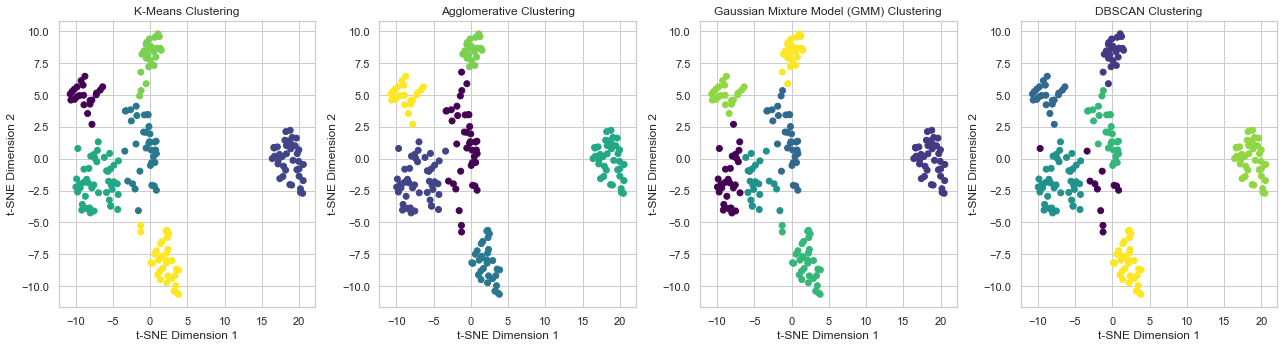

In [442]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming you have X_tsne from the previous code
# Number of clusters


# K-Means clustering
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans_labels = kmeans.fit_predict(X_tsne)

# Agglomerative Clustering
agc = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
agc_labels = agc.fit_predict(X_tsne)

# Gaussian Mixture Model (GMM) clustering
gmm = GaussianMixture(n_components=7, random_state=42)
gmm_labels = gmm.fit_predict(X_tsne)

# DBSCAN clustering
dbscan = DBSCAN(eps = 1.39, min_samples=6)
dbscan_labels = dbscan.fit_predict(X_tsne)

# Plot the clustering results
plt.figure(figsize=(18, 5))

plt.subplot(1, 4, 1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

plt.subplot(1, 4, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=agc_labels, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

plt.subplot(1, 4, 3)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=gmm_labels, cmap='viridis')
plt.title('Gaussian Mixture Model (GMM) Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

plt.subplot(1, 4, 4)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

plt.tight_layout()
plt.show()



## K-Means Clustering with t-SNE reduced dataset

In [640]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

kmeans = KMeans(n_clusters=6, random_state=42)
kmeans_labels = kmeans.fit_predict(X_tsne)
KMeans_tsne = df.copy()

KMeans_tsne['KMeans_Cluster'] = kmeans_labels

silhouette_avg = silhouette_score(df, kmeans_labels)

dbi_avg = davies_bouldin_score(df, kmeans_labels)

# Print the silhouette score and DBI
print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Index:", dbi_avg)



Silhouette Score: 0.45013271244245007
Davies-Bouldin Index: 0.7360286306634922


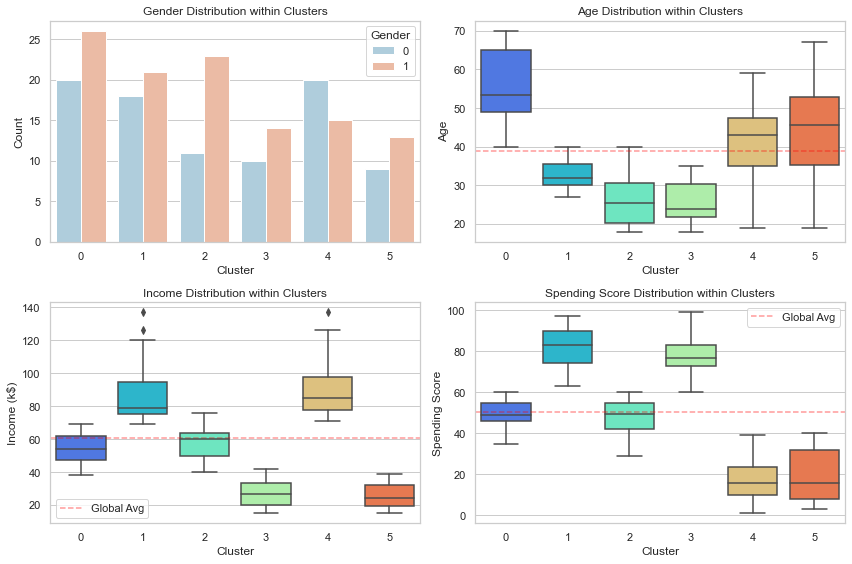

In [634]:


fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Global averages
global_avg_income = K_means_tsne['Income (k$)'].mean()
global_avg_spending = K_means_tsne['Spending Score'].mean()
global_avg_age = K_means_tsne['Age'].mean()

# Gender distribution within clusters
sns.countplot(data=K_means_tsne, x='KMeans_Cluster', hue='Gender', palette='RdBu_r', ax=axes[0, 0])
axes[0, 0].set_title('Gender Distribution within Clusters')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Count')

# Age within clusters
sns.boxplot(data=K_means_tsne, x='KMeans_Cluster', y='Age', palette='rainbow', ax=axes[0, 1])
axes[0, 1].axhline(y=global_avg_age, color='red', linestyle='--', label='Global Avg', alpha=0.4)
axes[0, 1].set_title('Age Distribution within Clusters')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Age')

# Income within clusters with global average line
sns.boxplot(data=K_means_tsne, x='KMeans_Cluster', y='Income (k$)', palette='rainbow', ax=axes[1, 0])
axes[1, 0].axhline(y=global_avg_income, color='red', linestyle='--', label='Global Avg', alpha=0.4)
axes[1, 0].set_title('Income Distribution within Clusters')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Income (k$)')
axes[1, 0].legend()
# Spending Score within clusters with global average line
sns.boxplot(data=K_means_tsne, x='KMeans_Cluster', y='Spending Score', palette='rainbow', ax=axes[1, 1])
axes[1, 1].axhline(y=global_avg_spending, color='red', linestyle='--', label='Global Avg', alpha=0.4)
axes[1, 1].set_title('Spending Score Distribution within Clusters')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Spending Score')
axes[1, 1].legend()
plt.tight_layout()
plt.show()


- Based on this, we would select __Cluster 1__ as the __mall's most valuable customer group__ as they exhibit __2nd Highest Median Income__, __Highest Spending Score__ among the rest of the clusters, while having a __below average age__ 

In [641]:
import plotly.express as px
import plotly.graph_objects as go

# Converting the cluster labels to strings so that we can see the legend for each clusters
K_means_tsne['KMeans_Cluster'] =K_means_tsne['KMeans_Cluster'].astype(str)

fig = px.scatter_3d(K_means_tsne, x='Age', y='Income (k$)', z='Spending Score', color='KMeans_Cluster',
                    opacity=0.9,width=800)

# We dont want the color bar 
fig.update_layout(
        coloraxis_showscale=False,
        title=f"Customer Clusters with KMeans",
    )

fig.show()